# Optimisation Convexe : Solveur SVM

Josselin GIET

## Travail effectué

Ce travail contient les éléments suivants : 
- une explication des notations utilisées pour résoudre le problème de la SVM
- un code python permettant de résoudre le problème de la SVM en utilisant l'algorithme de Newton
- un exmple d'utilisation de l'algorithme en 2D ainsi qu'une comparaison avec un classifieur SVM de la librairie sklearn
- Une expérience qui montre le rôle du nombre de points
- Une expérience qui montre le rôle de la valeur C
- Une expérience qui montre le rôle de la dimension des nuages de points

## Notation

### Quelques éléments sur la log-barrière 

Soit

$$
  f : x \mapsto -\sum_{i= 1}^m log(b_i-a_i^T x)
$$
la fonction de barière analytique.

Cette fonction est $\mathcal{C}^\infty$ sur $\text{dom}(f) = \{x| Ax < b\}$.

Et ses dérivées partielles à l'ordre 1 valent :
  $\forall k \in [1,n] ,\ \forall x\in \text{dom}(f),$

$$
  \frac{\partial f}{\partial x_k}(x) =
  \sum_{i= 1}^n \frac{a_{ik}}{b_i - a_i^T x}
$$

Donc son gradient vaut : $\forall x\in \text{dom}(f),$

$$
  \nabla f(x) = \sum_{i= 1}^m \frac{a_{i}}{b_i - a_i^T x} = A^T d
$$

où :

$$
d :=
    \left(
    \begin{array}{c}
    \frac{1}{b_1 -a_1^T x}\\
    \vdots\\
    \frac{1}{b_m -a_m^T x} \\
    \end{array}
    \right)
$$

De même les dérivées partielles d'ordre 2 sont bien définies :
$\forall k,l \in [1,n],\ \forall x\in \text{dom}(f),$

$$
  \frac{\partial^2 f}{\partial x_k x_\ell}(x) =
    \sum_{i= 1}^m \frac{a_{ik} a_{i\ell}}{(b_i - a_i^T x)^2}
$$

Et donc sa hessienne vaut : $\forall x \in \text{dom}(f)$,

$$
  \nabla^2 f(x) = A^T diag(d^2) A
$$

D'où le code python :

Dans le cas où

$$
\phi_t : x \mapsto c^Tx -\frac{1}{t}\sum_{i=0}^m log(b_i-a_i^T x)
$$

Cette fonction est $\mathcal{C}^\infty$
sur $\text{dom}(\phi) = \{x| Ax < b\}$,
et son gradient vaut : $\forall x\in \text{dom}(\phi),$

$$
  \nabla f(x) =c + \frac{1}{t}\sum_{i= 1}^m \frac{a_{i}}{b_i - a_i^T x}
    = c+ \frac{1}{t} A^T d
$$

Et sa hessienne vaut : $\forall x \in \text{dom}(\phi)$,

$$
  \nabla^2 \phi(x) = \frac{1}{t}A^T diag(d^2) A
$$


### Mise en place du problème de SVM

Soient :
- $(x_i)_{1\leq i\leq m}$ une famille de points de $\mathbb{R}^n$
- $(y_i)_{1\leq i\leq m}$ une famille de labels dans $\{-1,1\}$
- $C \in \mathbb{R}_+^*$

Le problème de la SVM s'écrit :

$$
\begin{array}{cl}
\textrm{mimimiser} & f(w,z) := \frac{1}{2} ||w||_2^2 + C 1^T z \\
w \in \mathbb{R}^n, \ z\in \mathbb{R}^m & \\
\textrm{tel que} & y_i(w^T x_i) \geq 1-z_i,\ \ \ i = 1,\dots,m \\
    & z \geq 0
\end{array}
$$

En posant :
$$
s := \left[
\begin{array}{c}
w \\ z
\end{array}
\right]
h_0 := \left[
\begin{array}{c}
1 \\ 0
\end{array}
\right]
h_1 := \left[
\begin{array}{c}
0 \\ 1
\end{array}
\right]$$

$$
X_i := -\left[
\begin{array}{c}
  \\ y_i x_i \\   \\ 0 \\ \vdots \\ 1 \\ 0 \\ \vdots
\end{array}
\right]
Y_i := -\left[
\begin{array}{c}
  \\ 0 \\   \\ 0 \\ 0 \\ 1 \\ 0 \\ \vdots
\end{array}
\right]
$$

Le problème se réécrit de la manière suivante : 

$$
\begin{array}{cl}
\textrm{mimimiser} & f(s) := \frac{1}{2} ||h_0*s||_2^2 + C h_1^T \cdot s \\
s \in \mathbb{R}^{n+2m} & \\
\textrm{tel que} & (-1) -X_i^T s \geq 0, \ \  i =  1\dots m \\
    & 0-Y_i^T s \geq 0, \ \  i =  1\dots m
\end{array}
$$

En posant 
$$
A := \left[
\begin{array}{c}
    X_1^T \\ \vdots \\ X_m^T \\ Y_1^T \\ \vdots \\ Y_m^T 
\end{array}
\right]
\ \ \ 
b := \left[
\begin{array}{c}
    -1 \\ \vdots \\ -1 \\ 0 \\ \vdots \\ 0 
\end{array}
\right]
$$

Le problème se réécrit sous la forme canonique : 


$$
\begin{array}{cl}
\textrm{mimimiser} & f(s) := \frac{1}{2} ||h_0*s||_2^2 + C h_1^T \cdot s \\
\textrm{tel que} & b - A s \geq 0 \\
    \end{array}
$$

où $*$ désigne la multiplication coordonées par coordonées (qui correspond à l'opérateur $\texttt{*}$ en Python).

Le gradient de la fonction à minimiser vaut : 

$$
\nabla f(s) = h_0 * s + C h_1
$$

Et sa hessienne : 
$$
\nabla^2 f(s) = h_0^T h_0
$$

### Résolution du Dual

Le problème dual de la SVM s'écrit : 

$$
\begin{array}{cl}
\textrm{maximiser} & g(\alpha) := 
    -\frac{1}{2} \alpha^T S \alpha + \textbf{1}^T \alpha \\
\alpha \in\mathbb{R}^m & \\
\textrm{tel que} & 0 \leq \alpha \leq C \\
\end{array}
\ \ \ \ \ 
(\mathcal{D})
$$

où : 
$S := \textbf{diag}(y) X^T X \textbf{diag}(y)$

Pour résoudre ce problème on va utiliser le fait suivant : 

$$
\alpha_0 \in\arg\max_{0\leq\alpha\leq C} g(\alpha) 
    \Leftrightarrow 
\alpha_0 \in\arg\min_{0\leq\alpha\leq C} -g(\alpha) 
$$

On cherche donc à résoudre le problème d'optmisation convexe suvant : 

$$
\begin{array}{cl}
\textrm{minimiser} & g^*(\alpha) := 
    +\frac{1}{2} \alpha^T S \alpha - \textbf{1}^T \alpha \\
\alpha \in\mathbb{R}^m & \\
\textrm{tel que} & b^d-A^d\alpha \geq 0 \\
    \end{array}
\ \ \ \ \ 
(\mathcal{D^*})
$$

où : 

$$
A^d = \left[\begin{array}{c}
-I_m \\ I_m
\end{array}
\right] 
\ \ \ \ 
b^d = \left[\begin{array}{c}
0 \\ C
\end{array}
\right] 
$$

Il vient alors : 

$$
\nabla g^*(\alpha) = S \alpha - \textbf{1}
$$

$$
\nabla^2 g^*(\alpha) = S 
$$

## Code

### Quelques importations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit as it
import time as time
from sklearn import svm
plt.rcParams["figure.figsize"] = (5,5)

### Fonction d'initialisation

In [2]:
def getModel(x,y,C):
    """Returns A, b, h0, Ch1 corespondong to standard model"""
    n = x.shape[1] # dimension des points
    m = x.shape[0] # nombre de points: en vrai, c'est m/2 (où m est le nombre de contraintes)
    
    # Calcul pourt le primal
    b = np.array([[-1] for i in range(m)]+[[0] for i in range(m)])
    A = np.concatenate((-x*y,np.zeros((m,m))),axis=1)
    A = np.concatenate((A,np.zeros((m,m+n))))
    h0 = np.concatenate((np.ones((n,1)), np.zeros((m,1))), axis = 0)
    Ch1 = C*np.concatenate((np.zeros((n,1)), np.ones((m,1))), axis = 0)
    for i in range(m): # Opti possible: np.eyes
        A[i,i+n] = -1
        A[i+m,i+n] = -1
    
    # Calcul pour le dual
    XX = np.dot(x,x.T)
    dy = np.diag(np.reshape(y,(m)))
    S = np.dot(dy, np.dot(XX, dy))
    Ad = np.concatenate((-np.eye(m),np.eye(m)))
    bd = np.concatenate((np.zeros((m,1)),C*np.ones((m,1))))
    return (A, b, h0, Ch1, S, Ad, bd)

def getFeasible(x,y):
    """Returns a feasible point s_0"""
    n = x.shape[1] # dimension des points
    m = x.shape[0] # nombre de points : en vrai, c'est m/2 (où m est le nombre de contraintes)
    w_0 = np.ones((n,1))
    z = np.zeros((m,1))
    for i in range(m):
        z[i,0] = max(10, -y[i,0]*np.dot(x[i,:],w_0)+10)
    return np.concatenate((w_0,z))

def getFeasibleDual(x,y,C):
    m = x.shape[0]
    if C <= 0:
        print("Paramètre C incorrect !")
        return
    return C/2*np.ones((m,1))

### Fonctions annexes pour la log barrière

In [3]:
def is_feasible(A,b,s):
    """Check if x is in dom(f)
    i.e b-Ax > 0""" 
    for i in range(len(b)):
        if b[i,0] - np.dot(A[i,:],s) <= 0:
            return False
    return True

def compute_log_barr(A,b,s):
    """compute the barrier. 
    Fail if x is not in dom(f)"""
    res = 0
    for i in range(len(b)):
        res -= np.log(b[i]-np.dot(A[i],s))
    return res

### Fonctions annexes pour le primal

In [4]:
def compute_f(s,h0,Ch1):
    return (0.5*np.linalg.norm(h0*s)**2 + np.dot(Ch1.T, s))[0,0]

def compute_phi(A,b,t,s,h0,Ch1):
    """ Compute the function to minimise and the barrier/t"""
    return compute_log_barr(A,b,s)/t + compute_f(s, h0, Ch1)

In [5]:
def newton(A,b,s_0,h0,Ch1,t=1,prnt=False,eps=10**(-6)):
    """ This function performs the newton algorithm with the log-barrier"""
    # sanity check
    if not is_feasible(A,b,s_0):
        print("La fonction Newton a recu un point non réalisable !")
        return 1
    m, n = A.shape
    beta = 0.75
    s = s_0
    f_s = compute_phi(A,b,t,s,h0,Ch1)
    S = [s]
    lamb = 1
    #print("Dans newton : "+str(s.shape))
    while (lamb)/2 >= eps:
        d = np.zeros(m)
        for i in range(m):
            d[i] = 1/(b[i]-np.dot(A[i],s))
        D = np.array([1/(b[i]-np.dot(A[i],s)) for i in range(n)])
        grad = np.reshape(np.dot(A.T, d)/t,(n,1))\
            + h0*s + Ch1
        hess = np.dot(A.T,np.dot(np.diag(d**2),A))/t \
            + np.dot(h0,h0.T)
        Dx = -np.linalg.solve(hess,grad)
        t_back = 1
        while not is_feasible(A, b, s+t_back*Dx):
            t_back *= beta
        while compute_phi(A, b, t, s+t_back*Dx, h0, Ch1) > f_s:
            t_back *= beta
        lamb = np.dot(grad.transpose(),-Dx)
        s = s+t_back*Dx
        f_s = compute_phi(A, b, t, s, h0, Ch1)
        S += [s]
    
    # Le reste n'est qu'affichage
    if prnt:
        print("Affichage newton primal")
        plt.subplot(1,2,1)
        D = [np.linalg.norm(s_i -s) for s_i in S]
        plt.semilogy(D,"o")
        plt.ylabel("$||x-x^*||$")
        plt.xlabel("nb de pas")
        #plt.show()
        
        plt.subplot(1,2,2)
        f_star = compute_f(s, h0,Ch1)
        F = [np.abs(f_star-compute_f(s_i, h0, Ch1)) for s_i in S]
        plt.semilogy(F,"o")
        plt.ylabel('$|f - f^*|$')
        plt.xlabel("nb de pas")
        plt.show()
    return s

### Fonctions annexes pour le dual

In [6]:
def compute_g_star(α, S):
    return 0.5*np.dot(np.dot(α.T, S), α)[0,0] - np.sum(α)

def compute_g(α, S):
    return -compute_g_star(α, S)

def compute_psi(A, b, t, α, S):
    """ Compute the function to minimise and the barrier/t"""
    return compute_log_barr(A, b, α)/t + compute_g_star(α, S)

In [7]:
def newtonDual(A, b, α_0, S, t=1, prnt=False, eps=10**(-6)):
    #print("Appel newtonDual")
    """ This function performs the newton algorithm with the log-barrier"""
    # sanity check
    if not is_feasible(A,b,α_0):
        print("La fonction Newton a recu un point non réalisable !")
        return 1
    m, n = A.shape
    β = 0.75
    α = α_0
    g_α = compute_psi(A, b, t, α, S)
    Alpha = [α]
    lamb = 1
    while (lamb)/2 >= eps:
        d = np.zeros(m)
        for i in range(m):
            d[i] = 1/(b[i]-np.dot(A[i],α))
        D = np.array([1/(b[i]-np.dot(A[i],α)) for i in range(n)])
        grad = np.reshape(np.dot(A.T, d)/t,(n,1)) \
            + np.dot(S, α) - np.ones((n,1)) 
        hess = np.dot(A.T,np.dot(np.diag(d**2),A))/t \
            + S
        Dx = -np.linalg.solve(hess,grad)
        t_back = 1
        while not is_feasible(A, b, α+t_back*Dx):
            t_back *= β
        while compute_psi(A, b, t, α+t_back*Dx, S) > g_α:
            t_back *= β
        lamb = np.dot(grad.T,-Dx)
        α = α + t_back*Dx
        g_α = compute_psi(A, b, t, α, S)
        Alpha += [α]
    
    # Le reste n'est qu'affichge
    # Attention ! Les affichages se font bien sur le dual (D)
    # et non pas sa version modifiée (D*)
    if prnt:
        print("Affichage newton dual")
        plt.subplot(1,2,1)
        D = [np.linalg.norm(α_i -α) for α_i in Alpha]
        plt.semilogy(D,"o")
        plt.ylabel("$||α-α^*||$")
        plt.xlabel("nb de pas")
        #plt.show()
    
        plt.subplot(1,2,2)
        g_star = compute_g(α, S)
        G = [np.abs(g_star-compute_g(α_i, S)) for α_i in Alpha]
        plt.semilogy(G,"o")
        plt.ylabel('$|g - g^*|$')
        plt.xlabel("nb de pas")
        plt.show()
    return α

In [8]:
def solveLP(A, b, s_0, h0, Ch1, Ad, bd, α_0, S, eps=10**(-4),prnt = False):
    # Sanity check
    if not is_feasible(A,b,s_0):
        print("La fonction solveLP a recu un point non réalisable !")
        return 1
    # Définition des paramètres
    mu = 15
    t = 1
    β = 0.75
    n,p = A.shape
    m = n
    # Initilisation pour le primal
    s_star = s_0
    S_star = [s_star]
    f_s = compute_f(s_star,h0,Ch1)
    # Initialisation pour le dual
    α_star = α_0
    A_star = [α_star]
    g_α = compute_g(α_star, S)
    i = 0
    while (np.abs(f_s-g_α) > eps):
        # Calcul pour le primal
        s_star = newton(A,b,s_star,h0,Ch1,t,prnt and i == 0)
        f_s = compute_f(s_star,h0,Ch1)
        S_star += [s_star]
        
        # Calcul pour le dual
        α_star = newtonDual(Ad, bd, α_star, S, t,prnt and i == 0)
        g_α = compute_g(α_star, S)
        A_star += [α_star]
        
        t *= mu
        i += 1
    
    f_star = compute_f(s_star, h0, Ch1)
    g_star = compute_g(α_star, S)
    
    # Le reste n'est qu'affichage
    if prnt:
        print("Convergence atteinte au bout de "+str(i)+" étapes.")
        plt.subplot(1,3,1)
        P = [np.linalg.norm(s_i -s_star) for s_i in S_star]
        D = [np.linalg.norm(α_i -α_star) for α_i in A_star]
        plt.semilogy(P,'o',label="$\mathcal{P}$")
        plt.semilogy(D,'o',label="$\mathcal{D}$")
        plt.legend()
        plt.ylabel("$||x-x^*||$")
        plt.xlabel("nb de pas")
        #plt.show()
        
        plt.subplot(1,3,2)
        F = [np.abs(f_star-compute_f(s, h0, Ch1)) for s in S_star]
        G = [np.abs(g_star-compute_g(α, S)) for α in A_star]
        plt.semilogy(F,'o', label="$\mathcal{P}$")
        plt.semilogy(G,'o', label="$\mathcal{D}$")
        plt.legend()
        plt.ylabel('$|f(g) - f^*(g^*|$')
        plt.xlabel("nb de pas")
        #plt.show()
        
        plt.subplot(1,3,3)
        plt.plot([i for i in range(len(S_star))][1::] ,[compute_f(s, h0, Ch1) for s in S_star][1::],label="$f$")
        plt.plot([i for i in range(len(A_star))][1::] ,[compute_g(α, S) for α in A_star][1::],label="$g$")
        plt.legend()
        plt.ylabel('$f(g) $')
        plt.xlabel("nb de pas")
        plt.show()


    return s_star,f_star

def get_class(x, y, C, prnt = False):
    """Returns w a classifieur"""
    n = x.shape[1]
    A, b, h0, Ch1, S, Ad, bd = getModel(x,y, C)
    s_0 = getFeasible(x,y)
    α_0 = getFeasibleDual(x,y,C)
    s_star,f_star = solveLP(A, b, s_0, h0, Ch1, Ad, bd, α_0, S, prnt = prnt)
    w = s_star[0:n,:]
    return w

## Les Benchs

### Tirage des données

In [9]:
# On tire des données au hasard : 
def R(θ):
    """Renvoie la matrice de rotation θ en 2D"""
    return np.array([[np.cos(θ),-np.sin(θ)],
                   [np.sin(θ), np.cos(θ)]])


def tirerBench(m, σ, μ0, μ1, Σ0, Σ1, prnt = False):
    """Tire les données selon des vecteurs gaussiens N(μ_i,Σ_i)"""
    m0 = int(np.random.normal(m/2,m/10)) 
    # on sélectionne le nombre de points dans chaque jeu aléatoirement
    m1 = m - m0
    x0 = np.array([np.random.normal(μ0,σ) for i in range(m0)])
    x0 = np.array([np.dot(xi-μ0,Σ0) +μ0 for xi in x0])
    x1 = np.array([np.random.normal(μ1,σ) for i in range(m1)])
    x1 = np.array([np.dot(xi-μ1,Σ1) +μ1 for xi in x1])
    #On affiche les données : 

    if prnt:
        plt.scatter(x0[:,0],x0[:,1],s=5,color="blue",label="label -1")
        plt.scatter(x1[:,0],x1[:,1],s=5,color="green",label="label 1")
        plt.legend()
        plt.show()

    x = np.concatenate((x0,x1))
    x = np.concatenate((x,np.ones((m,1))),axis=1) 
    # On rajoute un 1 pour l'offset
    # yaux = np.ones((m,1))
    y = np.concatenate((-np.ones((m0,1)),np.ones((m1,1))))
    
    return x,y,x0,x1
    

### Obtenir classifieur libstd

In [10]:
def get_classSK(x, y, C, timer = False):
    n = x.shape[1] - 1
    clf = svm.SVC(kernel='linear', C = C)
    newx = x[:,0:n]
    newy = np.reshape(y,(y.shape[0]))
    if timer:
        %time clf.fit(newx, newy)
    else:
        clf.fit(newx, newy)
    wSK = clf.coef_[0]
    wSK = np.array([[wSK[i]] for i in range(n) ]+[[clf.intercept_[0]]])
    return wSK
    

In [11]:
# Le reste n'est qu'affichage
def printClassificateur(w,xmax,xmin,ymax,ymin,lgd):
    if w[1] != 0:
        xx = np.linspace(xmin, xmax, 100)
        a = w[0]/w[1]
        yy = -a*xx - w[2]/w[1]
        plt.plot(xx,yy,label=lgd,lw=len(lgd)-5)
    else:
        yy = np.linespace(ymin, ymax, 100)
        xx = (-w[2]/w[0])*np.ones(100)
        plt.plot(xx,yy,label=lgd,lw=len(lgd)-5)

def score(x,y,w_class):
    res = 0
    for i,pnt in enumerate(x):
        if np.sign(np.dot(pnt,w_class)) == np.sign(y[i]):
            res += 1
    return res/x.shape[0]

### Un exemple complet en 2D

m = 500 :

classifieur SVM perso
---------------------
Affichage newton primal


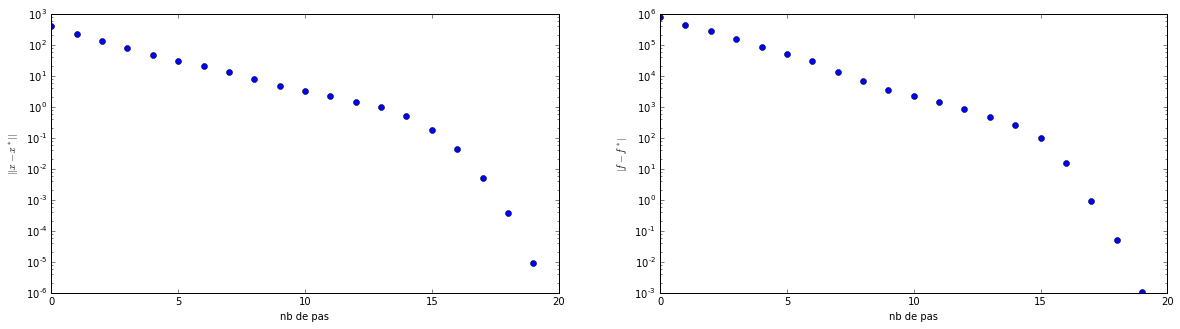

Affichage newton dual


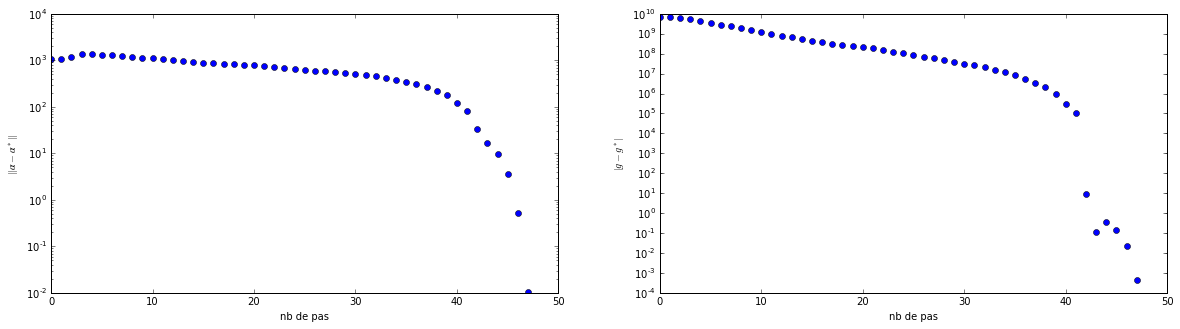

Convergence atteinte au bout de 7 étapes.


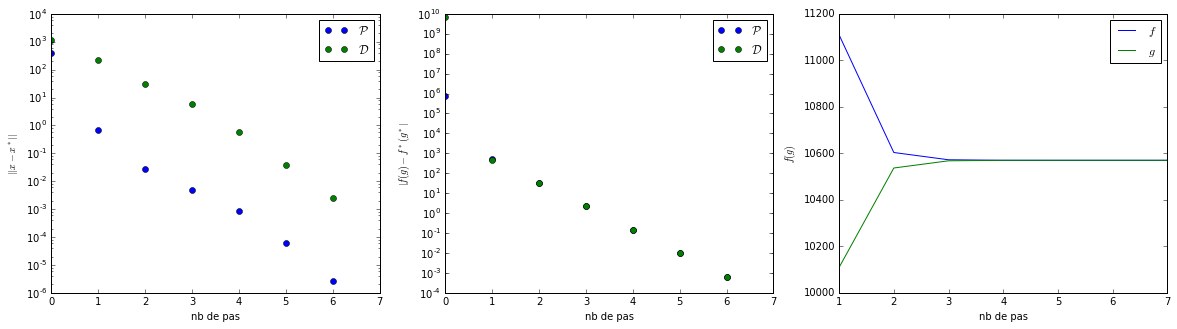

CPU times: user 26.4 s, sys: 37.3 s, total: 1min 3s
Wall time: 9.65 s

classifieur SVM libstd
----------------------
CPU times: user 660 ms, sys: 56 ms, total: 716 ms
Wall time: 657 ms

Comparaison
-----------
||w-wSK|| = 0.00573994683867

Généralisations
---------------
Le score du classifieur perso sur les données d'entrainement est 0.918
le score du classifieur perso sur les données de validation est 0.9015
Le score du classifieur sklearn sur les données d'entrainement est 0.918
le score du classifieur sklearn sur les données de validation est 0.9025


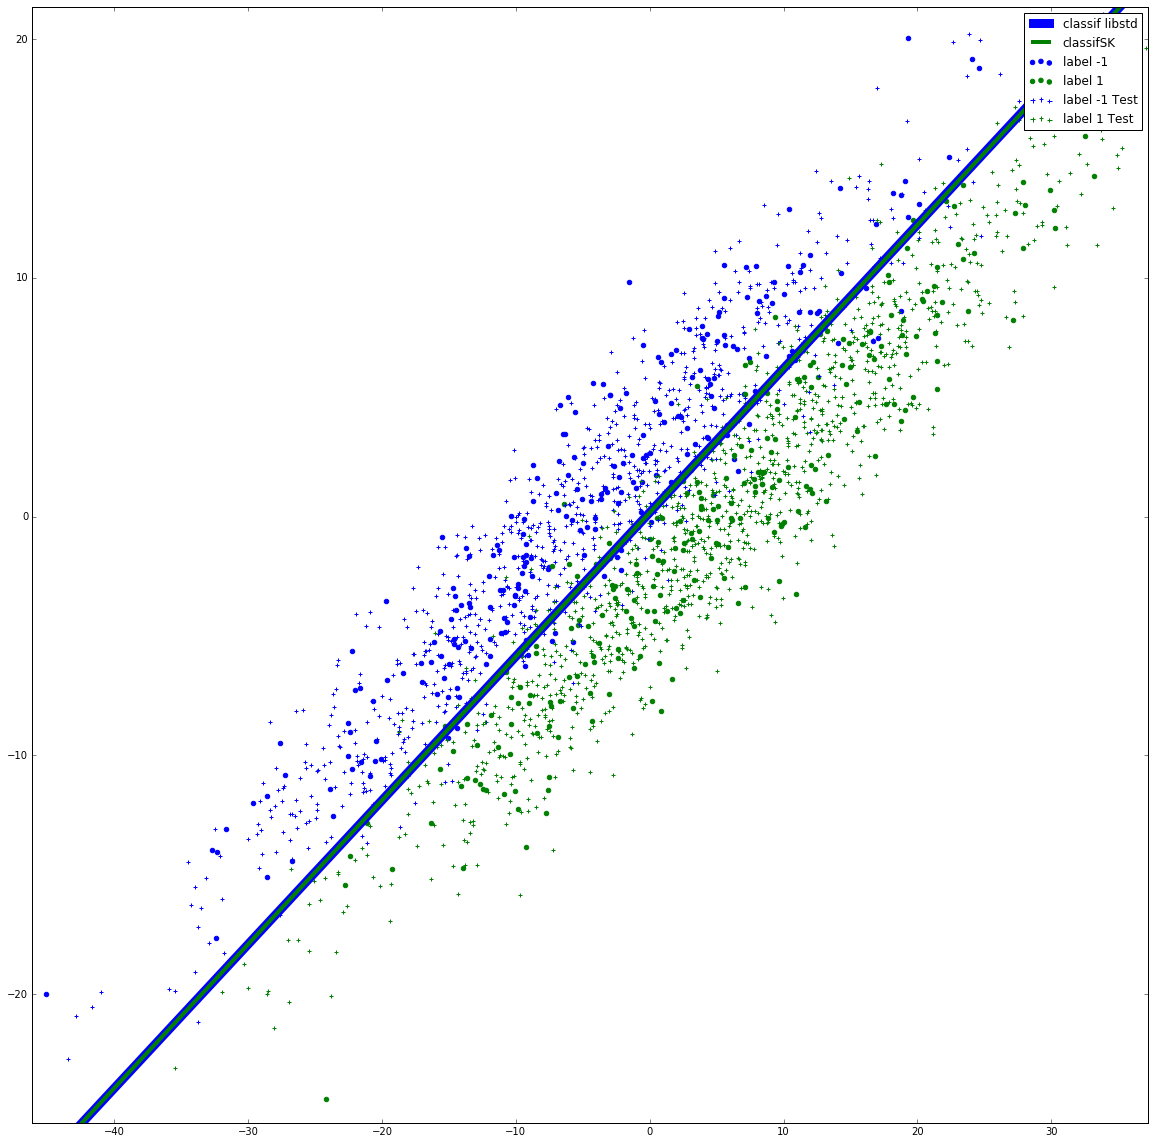

In [12]:
C = 100
μ0 = np.array([-5, 0])
μ1 = np.array([5, 0])
σ = np.array([2,15])
Σ0 = R(2*np.pi/6)
Σ1 = R(2*np.pi/6)

m = 500
x, y, x0, x1 = tirerBench(m, σ, μ0, μ1, Σ0, Σ1)
print("m = "+str(m)+str(" :"))
print("=============")
    
print("\nclassifieur SVM perso")
print("---------------------")
plt.rcParams["figure.figsize"] = (20,5)
t0 = time.time()
%time w = get_class(x, y, C, prnt = True)
dt = time.time() -t0

    
print("\nclassifieur SVM libstd")
print("----------------------")
wSK = get_classSK(x, y, C,timer = True)
    
# On affiche les classifieurs
print("\nComparaison")
print("-----------")
print("||w-wSK|| = "+str(np.linalg.norm(w-wSK)))

# On regarde les performance de généralisations
print("\nGénéralisations")
print("---------------")
xTest, yTest, x0Test, x1Test = tirerBench(4*m, σ, μ0, μ1, Σ0, Σ1)

print("Le score du classifieur perso sur les données d'entrainement est "+str(score(x,y,w)))
print("le score du classifieur perso sur les données de validation est "+str(score(xTest, yTest, w)))
print("Le score du classifieur sklearn sur les données d'entrainement est "+str(score(x,y,wSK)))
print("le score du classifieur sklearn sur les données de validation est "+str(score(xTest, yTest, wSK)))

plt.rcParams["figure.figsize"] = (20,20)
xmin , xmax = np.min(x[:,0]) , np.max(x[:,0])
ymin , ymax = np.min(x[:,1]) , np.max(x[:,1])
    
plt.scatter(x0[:,0],x0[:,1],s=20,color="blue",label="label -1")
plt.scatter(x1[:,0],x1[:,1],s=20,color="green",label="label 1")
plt.scatter(x0Test[:,0],x0Test[:,1],s=20,color="blue",marker="+",label="label -1 Test")
plt.scatter(x1Test[:,0],x1Test[:,1],s=20,color="green",marker="+",label="label 1 Test")


printClassificateur(w,xmax,xmin,ymax,ymin,"classif libstd")
printClassificateur(wSK,xmax,xmin,ymax,ymin,"classifSK")

plt.ylim(ymin-1,ymax+1)
plt.xlim(xmin-1,xmax+1)
plt.legend()
plt.show()


### Expérience 1 : importance du nombre de points

In [13]:
T, Tsk = [], []
rge = [n for n in range(5,501,5)]
nb = 5

for m in rge:
    if m % 20 == 0:
        print("m = "+str(m))
    dt , dtSK = 0 , 0
    for i in range(nb):
        x, y, x0, x1 = tirerBench(m, σ, μ0, μ1, Σ0, Σ1)
        # Calcul classifieur perso
        t0 = time.time()
        w = get_class(x, y, C, prnt = False)
        dt += time.time() -t0
        # Calcul classifieur sklearn
        t0 = time.time()
        wSK = get_classSK(x, y, C, timer = False)
        dtSK += time.time() -t0
    T += [dt/nb]
    Tsk += [dtSK/nb]
    
    
    
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(rge,T,"o",label="classif")
plt.plot(rge,Tsk,"+",label="classifsk")
plt.xlabel("nb points")
plt.ylabel("temps en s")
plt.legend()
plt.show()

m = 20
m = 40
m = 60
m = 80
m = 100
m = 120
m = 140
m = 160
m = 180
m = 200
m = 220
m = 240
m = 260
m = 280
m = 300
m = 320
m = 340
m = 360


KeyboardInterrupt: 

### Expérience 2 : influence de C

In [ ]:
m = 250
x, y, x0, x1 = tirerBench(m, σ, μ0, μ1, Σ0, Σ1)
nb = 5
T, Tsk = [] , []
S, SSK = [] , []
Δw = []
rge = [c for c in range(5,151,5)]

for C in rge:
    if C % 50 == 0:
        print("C = "+str(C)+str(" :"))
    dt , dtSK = 0 , 0
    δw = 0
    s , sSK = 0 , 0
    for i in range(nb):
        x, y, x0, x1 = tirerBench(m, σ, μ0, μ1, Σ0, Σ1)
        # Calcul classifieur perso
        t0 = time.time()
        w = get_class(x, y, C, prnt = False)
        dt += time.time() -t0
        s += score(x, y, w)
        
        # Calcul classifieur sklearn
        t0 = time.time()
        wSK = get_classSK(x, y, C, timer = False)
        dtSK += time.time() -t0
        sSK += score(x, y, wSK)
        
        δw += np.linalg.norm(w-wSK)
    
    Δw += [δw/nb]
    T += [dt/nb]
    Tsk += [dtSK/nb]
    S += [s/nb]
    SSK += [sSK/nb]
    
plt.rcParams["figure.figsize"] = (20,5)

    
plt.subplot(1,3,1)
plt.plot(rge,T,"o",label="classif")
plt.plot(rge,Tsk,"+",label="classifsk")
plt.xlabel("C")
plt.ylabel("temps en s")
plt.legend()

plt.subplot(1,3,2)
plt.plot(rge,S,"o",label="classif")
plt.plot(rge,SSK,"+",label="classifsk")
plt.xlabel("C")
plt.ylabel("score")
plt.legend()

plt.subplot(1,3,3)
plt.plot(rge,Δw,"o")
plt.xlabel("C")
plt.ylabel("Δw")
plt.show()

### Expérience 3 : Rôle de la dimension

In [ ]:
# tirae des données en dimension n :
m = 250
C = 100
nb = 1
rge = range(1,21,1)

def tireND(n):
    m0 = int(np.random.normal(m/2,m/10)) 
    # on sélectionne le nombre de points dans chaque jeu aléatoirement
    m1 = m - m0
    x0 = [[np.random.normal() for i in range(n)]+[1] for j in range(m0)]
    x1 = [[np.random.normal()+1 for i in range(n)]+[1] for j in range(m1)]
    x = np.concatenate((np.array(x0),np.array(x1)) )
    y = np.concatenate((-np.ones((m0,1)),np.ones((m1,1))) )
    return x,y,x0,x1

T, Tsk = [] , []
S, SSK = [] , []
Δw = []

for n in rge:
    if n % 5 == 0:
        print("n = "+str(n)+str(" :"))
    dt , dtSK = 0 , 0
    δw = 0
    s , sSK = 0 , 0
    for i in range(nb):
        x, y, x0, x1 = tireND(n)
    
        t0 = time.time()
        w = get_class(x, y, C, prnt = False)
        dt += time.time() -t0
        s += score(x, y, w)
    
        t0 = time.time()
        wSK = get_classSK(x, y, C, timer = False)
        dtSK += time.time() -t0
        sSK += score(x, y, wSK)
        δw += np.linalg.norm(w-wSK)
    
    S += [s/nb]
    T += [dt/nb]
    SSK += [sSK/nb]
    Tsk += [dtSK/nb]
    
    Δw += [δw]
    
plt.rcParams["figure.figsize"] = (20,5)

    
plt.subplot(1,3,1)
plt.plot(rge,T,"o",label="classif")
plt.plot(rge,Tsk,"+",label="classifsk", lw= 35)
plt.xlabel("dimension")
plt.ylabel("temps en s")
plt.legend()



plt.subplot(1,3,2)
plt.plot(rge,S,"o",label="classif")
plt.plot(rge,SSK,"+",label="classifsk",lw = 15)
plt.xlabel("dimension")
plt.ylabel("score")
plt.legend()

plt.subplot(1,3,3)
plt.plot(rge,Δw,"o")
plt.xlabel("dimension")
plt.ylabel("Δw")
plt.show()